In [43]:
#import modules
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

In [2]:
#read csv files
input_dir=os.path.join(r'Z:\balint\numt\ensembl_mammalian_numts/csvs/')
dataframes=pd.Series(os.listdir(r'Z:\balint\numt\ensembl_mammalian_numts/csvs/')).apply(
    lambda file: pd.read_csv(input_dir+file))
#add indnices
dataframes.index=pd.Series(os.listdir(r'Z:\balint\numt\ensembl_mammalian_numts/csvs/')).apply(
    lambda filename:filename.split('.')[0][:-23])

In [3]:
length_of_numts=dataframes.apply(lambda df: sum(df['g_length']))
length_of_numts

Ailuropoda_melanoleuca    115642
Aotus_nancymaae           469034
Balaenoptera_musculus     513240
Bison_bison_bison         297542
Bos_grunniens             291657
                           ...  
Ursus_americanus          165386
Ursus_maritimus            90824
Vicugna_pacos             197728
Vombatus_ursinus          110790
Vulpes_vulpes             243995
Length: 82, dtype: int64

In [4]:
number_of_numts=dataframes.apply(lambda df: len(df['g_length']))
number_of_numts

Ailuropoda_melanoleuca    258
Aotus_nancymaae           636
Balaenoptera_musculus     417
Bison_bison_bison         543
Bos_grunniens             462
                         ... 
Ursus_americanus          579
Ursus_maritimus           168
Vicugna_pacos             269
Vombatus_ursinus          105
Vulpes_vulpes             475
Length: 82, dtype: int64

In [5]:
max_numt_sizes=dataframes.apply(lambda df: max(df['g_length']))
max_numt_sizes

Ailuropoda_melanoleuca     4240
Aotus_nancymaae           10432
Balaenoptera_musculus     13752
Bison_bison_bison         16318
Bos_grunniens             11009
                          ...  
Ursus_americanus           4062
Ursus_maritimus           17016
Vicugna_pacos             16651
Vombatus_ursinus          16995
Vulpes_vulpes              6763
Length: 82, dtype: int64

In [6]:
min_numt_sizes=dataframes.apply(lambda df: min(df['g_length']))
min_numt_sizes

Ailuropoda_melanoleuca    48
Aotus_nancymaae           38
Balaenoptera_musculus     52
Bison_bison_bison         40
Bos_grunniens             46
                          ..
Ursus_americanus          46
Ursus_maritimus           40
Vicugna_pacos             53
Vombatus_ursinus          47
Vulpes_vulpes             42
Length: 82, dtype: int64

In [7]:
avg_numt_lengths=dataframes.apply(lambda df: np.mean(df['g_length']))
avg_numt_lengths

Ailuropoda_melanoleuca     448.224806
Aotus_nancymaae            737.474843
Balaenoptera_musculus     1230.791367
Bison_bison_bison          547.959484
Bos_grunniens              631.292208
                             ...     
Ursus_americanus           285.640760
Ursus_maritimus            540.619048
Vicugna_pacos              735.048327
Vombatus_ursinus          1055.142857
Vulpes_vulpes              513.673684
Length: 82, dtype: float64

In [8]:
med_numt_lengths=dataframes.apply(lambda df: np.median(df['g_length']))
med_numt_lengths

Ailuropoda_melanoleuca    280.5
Aotus_nancymaae           347.5
Balaenoptera_musculus     639.0
Bison_bison_bison         307.0
Bos_grunniens             349.0
                          ...  
Ursus_americanus          225.0
Ursus_maritimus           251.0
Vicugna_pacos             459.0
Vombatus_ursinus          140.0
Vulpes_vulpes             271.0
Length: 82, dtype: float64

In [10]:
#get genome sizes in Mb
sizes=pd.Series([2.444,2.862,2.375,2.828,2.833,2.674,2.645,2.716,2.898,2.169,2.398,2.397,2.923,3.454,2.723,2.848,
       2.391,2.938,3.286,2.400,3.632,2.363,2.236,2.716,2.426,3.045,2.618,3.100,2.479,2.864,2.801,2.971,
      2.949,3.062,2.457,2.487,2.287,3.598,2.356,3.070,2.474,2.553,2.728,2.475,2.552,3.061,2.681,2.844,
      3.075,2.231,2.996,1.859,2.737,2.628,2.298,2.578,2.409,3.052,3.050,2.870,2.512,3.193,2.372,2.512,
      3.065,2.412,2.798,2.648,2.977,3.038,2.651,3.087,2.879,2.423,2.502,2.137,2.379,2.352,2.330,2.120,
      3.487,2.422])
sizes.index=pd.Series(os.listdir(r'Z:\balint\numt\ensembl_mammalian_numts/csvs/')).apply(
    lambda filename:filename.split('.')[0][:-23])
sizes

Ailuropoda_melanoleuca    2.444
Aotus_nancymaae           2.862
Balaenoptera_musculus     2.375
Bison_bison_bison         2.828
Bos_grunniens             2.833
                          ...  
Ursus_americanus          2.352
Ursus_maritimus           2.330
Vicugna_pacos             2.120
Vombatus_ursinus          3.487
Vulpes_vulpes             2.422
Length: 82, dtype: float64

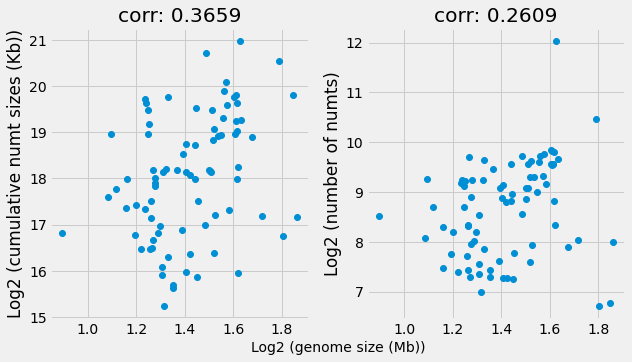

In [11]:
figs_dir=os.path.join(r'Z:\balint\numt\ensembl_mammalian_numts\figs/')
plt.style.use('fivethirtyeight')
fig,axs=plt.subplots(1,2,sharex='row', sharey=False, figsize=(9,5))
axs[0].plot(sizes.apply(lambda size:math.log2(size)),
            length_of_numts.apply(lambda length:math.log2(length)),'o')
axs[0].set_ylabel('Log2 (cumulative numt sizes (Kb))')
axs[0].set_title(f'corr: {np.round(np.corrcoef(sizes,length_of_numts)[1][0],decimals=4)}')

axs[1].plot(sizes.apply(lambda size:math.log2(size)),
            number_of_numts.apply(lambda number:math.log2(number)),'o')
axs[1].set_ylabel('Log2 (number of numts)')
axs[1].set_title(f'corr: {np.round(np.corrcoef(sizes,number_of_numts)[1][0],decimals=4)}')
fig.text(0.4,0.0001, 'Log2 (genome size (Mb))', fontsize=14)
plt.tight_layout()
plt.savefig(figs_dir+'g_size_numt_count_corr.png',dpi=200)

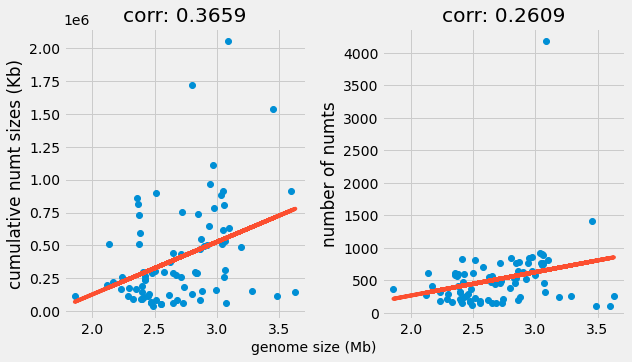

In [16]:
plt.style.use('fivethirtyeight')
fig,axs=plt.subplots(1,2,sharex='row', sharey=False, figsize=(9,5))
axs[0].plot(sizes,length_of_numts,'o')
axs[0].set_ylabel('cumulative numt sizes (Kb)')
axs[0].set_title(f'corr: {np.round(np.corrcoef(sizes,length_of_numts)[1][0],decimals=4)}')
m0, b0 = np.polyfit(sizes,length_of_numts, 1)
axs[0].plot(sizes, m0*sizes + b0)

axs[1].plot(sizes,number_of_numts,'o')
axs[1].set_ylabel('number of numts')
axs[1].set_title(f'corr: {np.round(np.corrcoef(sizes,number_of_numts)[1][0],decimals=4)}')
m1, b1 = np.polyfit(sizes,number_of_numts, 1)
axs[1].plot(sizes, m1*sizes + b1)
fig.text(0.4,0.0001, 'genome size (Mb)', fontsize=14)
plt.tight_layout()
plt.savefig(figs_dir+'g_size_numt_count_corr.png',dpi=200)

In [25]:
#add organism name to subdfs and merge the subdfs
def add_organism_name(organism_name):
    df=dataframes[organism_name]
    df['organism_name']=len(df)*[organism_name]
    
pd.Series(dataframes.index.values).apply(add_organism_name)

merged_df=pd.concat(dataframes.tolist())
merged_df=merged_df.set_index('organism_name')
merged_df['organism_name']=merged_df.index.values

In [29]:
#function for calculating identity
def seq_identity(row):
    g_seq=row['g_sequence'].upper()
    mt_seq=row['mt_sequence'].upper()
    identity=[]
    pd.Series(np.arange(0,len(g_seq),1)).apply(
        lambda index:identity.append(1) if g_seq[index]==mt_seq[index] else identity.append(0))
    identity=(sum(identity)/len(g_seq))*100
    return identity
#add identity column to df
merged_df['identity']=merged_df.apply(seq_identity,axis=1)



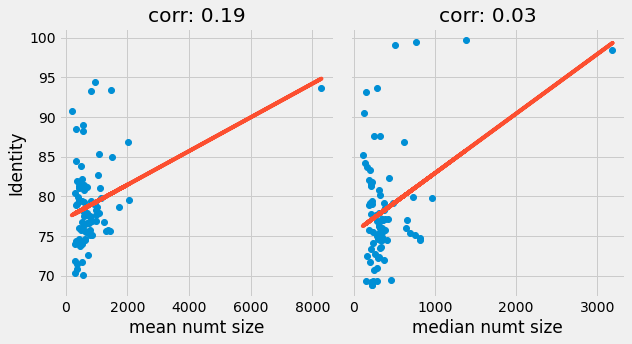

In [53]:
def identity_central_tendencies(organism_name):
    
    global numt_size_means
    global numt_size_medians
    global identity_means
    global identity_medians
    
    subdf=merged_df.loc[merged_df['organism_name']==organism_name]
    
    numt_size_means.append(np.mean(subdf['g_length']))
    numt_size_medians.append(np.median(subdf['g_length']))
    identity_means.append(np.mean(subdf['identity']))
    identity_medians.append(np.median(subdf['identity']))
    
numt_size_means=[]
numt_size_medians=[]
identity_means=[]
identity_medians=[]

pd.Series(np.unique(merged_df.index.values)).apply(identity_central_tendencies)

numt_size_means=pd.Series(numt_size_means)
numt_size_medians=pd.Series(numt_size_medians)
identity_means=pd.Series(identity_means)
identity_medians=pd.Series(identity_medians)

fig,axs=plt.subplots(1,2,figsize=(9,5),sharey=True)
axs[0].plot(numt_size_means,identity_means,'o')
m0, b0 = np.polyfit(numt_size_means,identity_means, 1)
axs[0].plot(numt_size_means, m0*numt_size_means + b0)
axs[0].set_title(f'corr: {np.round(spearmanr(numt_size_means,identity_means)[0],2)}')
axs[0].set_xlabel('mean numt size')
axs[0].set_ylabel('Identity')

axs[1].plot(numt_size_medians,identity_medians,'o')
m1, b1 = np.polyfit(numt_size_medians,identity_medians, 1)
axs[1].plot(numt_size_medians, m1*numt_size_medians + b1)
axs[1].set_title(f'corr: {np.round(spearmanr(numt_size_medians,identity_medians)[0],2)}')
axs[1].set_xlabel('median numt size')
plt.tight_layout()
plt.savefig(figs_dir+'numt_vs_identity.png',dpi=200)

In [93]:
gcs={'Ailuropoda_melanoleuca':41.7801,'Aotus_nancymaae':41.1,'Balaenoptera_musculus':41.0934,
     'Bison_bison_bison':42.2,'Bos_grunniens':41.966,'Bos_indicus_hybrid':42.1399,'Bos_mutus':41.3,
    'Bos_taurus':41.6843,'Callithrix_jacchus':40.9,'Camelus_dromedarius':41.5,'Canis_lupus_dingo':41.3,
    'Canis_lupus_familiaris':41.2033,'Capra_hircus':42.2323,'Carlito_syrichta':41,'Cavia_porcellus': 40.1,
    'Cercocebus_atys':41.1,'Chinchilla_lanigera':41.4,'Chlorocebus_sabaeus':41.1,'Choloepus_hoffmanni':40,
    'Cricetulus_griseus':41.5142,'Dasypus_novemcinctus':41.5,'Delphinapterus_leucas':41.4,
    'Dipodomys_ordii':42.6,'Erinaceus_europaeus':41.9999,'Felis_catus':41.8806,'Gorilla_gorilla':40.929,
    'Heterocephalus_glaber_female':40.7,'Homo_sapiens':40.4,'Ictidomys_tridecemlineatus':40.1,
    'Jaculus_jaculus':41.9885,'Macaca_fascicularis':41.1326,'Macaca_mulatta':41.072,
    'Macaca_nemestrina':41.3,'Mandrillus_leucophaeus':41.6,'Mesocricetus_auratus':42.75,
     'Microcebus_murinus':41.3423,'Microtus_ochrogaster':41.2156,'Monodelphis_domestica':38.1446,
    'Monodon_monoceros':41.3,'Moschus_moschiferus':40.55,'Mustela_putorius_furo':41.5,
    'Mus_caroli':42.6193,'Mus_musculus':42.6486,'Mus_pahari':42.6694,'Mus_spretus':42.3292,
    'Nannospalax_galili':41.6,'Neovison_vison':42.248,'Nomascus_leucogenys':41.0988,
    'Notamacropus_eugenii':40.4,'Ochotona_princeps':44.2103,'Octodon_degus': 42.5,
    'Ornithorhynchus_anatinus':46.2349,'Oryctolagus_cuniculus':44.0526,'Ovis_aries':42.0358,
    'Panthera_leo':41.5466,'Panthera_pardus':41.9,'Panthera_tigris_altaica':41.5,'Pan_paniscus':41.5096,
    'Pan_troglodytes':40.8082,'Papio_anubis':40.9646,'Peromyscus_maniculatus_bairdii':42.6794,
    'Phascolarctos_cinereus':45.05,'Phocoena_sinus':41.4452,'Physeter_catodon':41.3,'Pongo_abelii':41.1801,
    'Prolemur_simus':37.8,'Propithecus_coquereli':43.2,'Rattus_norvegicus':41.7411,
     'Rhinopithecus_bieti':41.5,'Rhinopithecus_roxellana':40.9541,'Saimiri_boliviensis_boliviensis':41.05,
     'Sarcophilus_harrisii':37.15,'Sciurus_vulgaris':39.2685,'Sorex_araneus':43.4,'Sus_scrofa':41.6,
    'Tupaia_belangeri':41.4,'Tursiops_truncatus':40.9,'Ursus_americanus':39.5,'Ursus_maritimus':41.8,
    'Vicugna_pacos':41.65,'Vombatus_ursinus':44.7,'Vulpes_vulpes':41.3}

gc_content=pd.Series(number_of_numts.index.values).apply(lambda organism_name: gcs[organism_name])
gc_content.index=number_of_numts.index.values

fig,axs=plt.subplots(1,2,figsize=(9,5),sharey=True)
axs[0].plot(number_of_numts,gc_content,'o')
axs[0].set_title(f'corr: {np.round(pearsonr(number_of_numts,gc_content)[0],2)}')
axs[0].set_xlabel('Number of numts')
m0, b0 = np.polyfit(number_of_numts,gc_content, 1)
axs[0].plot(number_of_numts, m0*number_of_numts + b0)
#axs[0].set_xlim(0,1000)

axs[1].plot(length_of_numts,gc_content,'o')
axs[1].set_title(f'corr: {np.round(pearsonr(length_of_numts,gc_content)[0],2)}')
axs[1].set_xlabel('Length of numts')
axs[0].set_ylabel('GC content')
m1, b1 = np.polyfit(length_of_numts,gc_content, 1)
axs[1].plot(length_of_numts, m1*length_of_numts + b1)
plt.tight_layout()
#plt.savefig(figs_dir+'gc_numt_number_and_length_corr.png',dpi=200)

,score,eg2_value,e_value,g_id,g_start,mt_start,g_length,mt_length,g_strand,mt_strand,g_size,g_sequence,mt_sequence,organism_name
0,2464,0.000000e+00,0.000000e+00,4,79920566,12487,2871,2869,+,+,156860686,AAGTACAATAGTAGTTGCAGGAATCTTTCTACTGGTCCGATTTCAC...,AAGTACAATAGTAGTTGCAGGAATTTTCCTACTGGTCCGATTCCAC...,Mus_musculus
1,731,0.000000e+00,0.000000e+00,5,84766087,4846,1588,1594,+,+,151758149,AAAATAATTACCCACCACACATGCTTCAAAAATAACTTTATCCTTc...,AAAataataactcaCCAAACAAAAACTAAACCCAACCTAATATTTT...,Mus_musculus
2,695,0.000000e+00,0.000000e+00,4,9958624,3198,1326,1316,+,+,156860686,TTATATCAGTCCTATTAATAAGCAGGTCACTTTCTCTACAAATATG...,TTTTATCAGTTCTATTAATAAATGGATCCTACTCTCTACAAACACT...,Mus_musculus
3,618,2.300000e-277,3.800000e-281,5,7326298,14714,1002,1000,+,+,151758149,GCCATAGTAATTTTTCATCTCCTTTTTCCTTCACAAAACAGGATCA...,GCCCTAGCAATCGTTCACCTCCTCTT-CCTCCACGAAACAGGATCA...,Mus_musculus
4,459,1.100000e-201,1.900000e-205,8,102750360,14921,1183,1214,+,+,130127694,AATGCCCTCCATACCCTACCCCACATTAAACCAGAATGATACTTCC...,AATCCACTAAACACCCCACCCCATATTAAACCCGAATGATATTTCC...,Mus_musculus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,41,1.000000e-02,1.800000e-06,1,38753807,10511,72,71,+,-,195154279,CCAGCTAAATGTAGAGAAAAAAATTGTTAGACCGACTGATGCTCCT...,CCAGCTAAATGAAGGGAGAAAA-TTGTTAGGTCTACTGATGCTCCT...,Mus_musculus
149,41,1.000000e-02,1.800000e-06,6,84023575,3836,57,57,+,-,149588044,GTTGGGCCTTCTATAGCTGATGGAAGTCATGGATGAAGTCCGAATT...,GTAGGGCCTTCTATTGCTGATGGTAGTCATGGGTGGAGGCCAAATT...,Mus_musculus
150,41,1.000000e-02,1.800000e-06,11,48196043,3007,77,77,+,-,121973369,ATTTGTTTTGTCTGTGGAAAATTTTATAGTTAGGTTGCTTAGTTCT...,ATTTGCTTTATTTATTGATAGTTTTATGGTTAGGTTGTTTAGTTCT...,Mus_musculus
151,38,2.700000e-01,4.700000e-05,8,39205647,4187,66,66,+,-,130127694,AATAGTATTAGATATTTAATAAATCAGTTAATATGTAGGTCTGAGT...,AATAGTGTAAGATATTTAATGAATCGATTGATGTTTGGGTCTGAGT...,Mus_musculus
